# HomeWork 6

**DeadLine : 12:00 PM 12 Aban 1399**

**Total points : 125 pts**


Import some prerequisites

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [15]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [16]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# PART 4A

**Point : 15 pts**

Here is for your helper functions(optional)

Implement this function to detect and remove circles in the given image.

In [17]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Writer your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
    
    for i in circles[0,:]:
        for r in range(0, int(i[2])):
            cv2.circle(out_img,(i[0],i[1]),r,(0, 0, 0),10)

    return out_img

Test your implementation (dont change this cell)

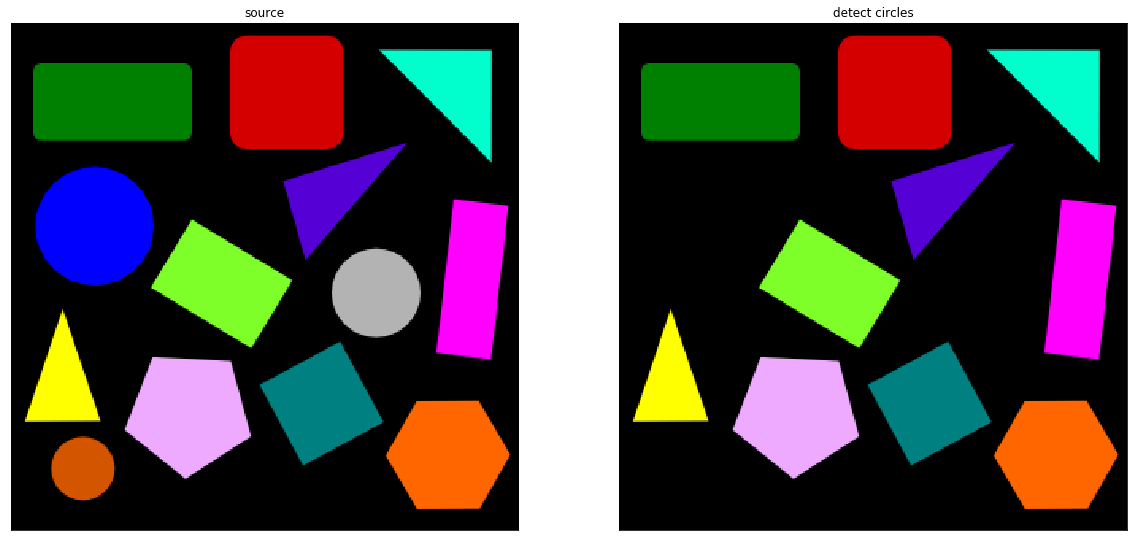

In [18]:
image_list = []

image = cv2.imread(os.path.join('images', '1.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# PART 4B

**Point : 15 pts**

Implement this function to detect lines in the given image with hough algorithm.

In [19]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Writer your code here
    
    edges = cv2.Canny(image,50,170)


    lines = cv2.HoughLinesP(edges, rho = 0.1, theta = 1*np.pi/180, threshold = 1, minLineLength = 0.5, maxLineGap = 2)
    print(len(lines))
    
    for i in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[i]:
            out_img = cv2.line(out_img,(x1,y1),(x2,y2),(255,255,255),2)


    return out_img

Test your implementation (dont change this cell)

1451


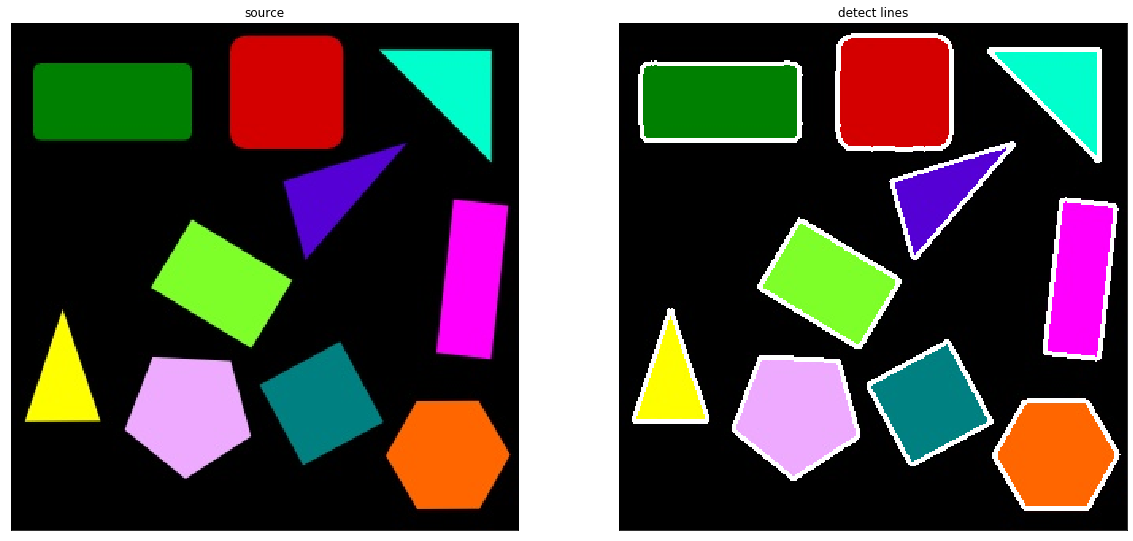

In [20]:
image_list = []

image = cv2.imread(os.path.join('images', '1b.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# PART 5

**Point : 25 pts**

Here is for your helper functions(optional)

Implement RANSAC function here.

In [21]:
def ransac(image):
    '''
    Gets input image and return rho and theta of line detected. 
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    '''

    img = image.copy()
    rho, theta = 0, 0
    
    #Write your code here
    rows, cols = image.shape
    
    white_points = []
    for row in range(0, rows):
        for col in range(0, cols):
            if img[row, col] == 255:
                white_points.append((row, col))
    
    repeat_count = 15
    result_points = []
    result_distances = []
    result_origins = []
    for i in range(0, repeat_count):
        
        #Choose two random white points
        points = random.sample(white_points, 2)
#         print(points)
        #Form the line
        line = []
        (x1, y1) = points[0]
        (x2, y2) = points[1]
        
        if x1 != x2:
            slope = (y2-y1)/(x2-x1)
            c = y1 - slope*x1

        else:
            slope = math.inf
            c = x1
        
#         print("slope ", slope, " c ", c)
        
        #Evaluate
        voted_distances = []
        voted_points = []
        for point in white_points:
            # https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
            (x, y) = point
            if slope != math.inf:
                dist = abs(c + slope * x - y) / math.sqrt(slope**2 + 1)
            else:
                dist = abs(x-c)
                
            if dist < 12:
                voted_points.append(point)
                voted_distances.append(dist)
        
        #If evaluate better than last, swap
        if len(voted_points) > len(result_points):
#             print("RESULT SWAPED IN ", i)
            result_points = voted_points
            result_distances = voted_distances
            result_origins = points
        elif len(voted_points) == len(result_points):
            voted_sum = sum(voted_distances)
            result_sum = sum(result_distances)
            if result_sum > voted_sum:
#                 print("RESULT SWAPED IN ", i)
                result_points = voted_points
                result_distances = voted_distances
#                 result_origins = points
#         print("RESULT ORIGINS ", result_origins)
#         print("+++++++++++++++++++++++++++++++++++++++++++")
        
    
    xs = []
    ys = []
    xys = []
    for point in result_points:
        xs.append(point[1])
        ys.append(point[0])
        xys.append(point[0] * point[1])
            
        
        
    xbar = np.mean(xs)
    ybar = np.mean(ys)
    x2bar = np.mean([x**2 for x in xs])
    y2bar = np.mean([x**2 for x in ys])
    xybar = np.mean(xys)

    theta = 0.5 * np.arctan(2*(xybar - xbar*ybar)/(x2bar - y2bar - xbar**2 + ybar**2))
    rho = xbar*np.cos(theta) + ybar*np.sin(theta)
            
        

    return rho, theta

Test your implementation (dont change this cell)

20.134602233660868 -0.03580446687612933
55 998 -15 -1000


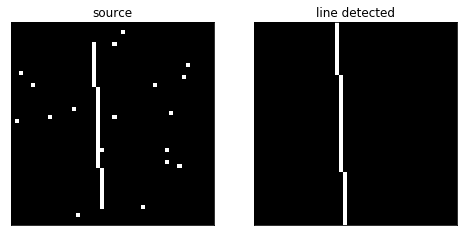

In [22]:
image_list = []
image = cv2.imread(os.path.join('images', '2.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta = ransac(image)
print(rho, theta)
x1, y1, x2, y2 = pol_to_car(rho, theta)
print(x1, y1, x2, y2)
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'q5')

# PART 6

**Point : 25pts**

Here is for your helper functions(optional)

Implement this function for return rho and theat of line detected and hough transform image.

In [29]:
def hough_transform_line(image):
    '''
    Returns rho and theat of line detected and hough transform image.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): Angle from origin to the line.
        theta (float): The distance from the origin to the line.
        hough_transform (numpy.ndarray): Hough transform image.
    '''

    img = image.copy()
    rho, theta = 0, 0

    #Write your code here
    
    rows, cols = image.shape
    rho_max = int(np.sqrt(rows**2 + cols**2))
    rhos = np.linspace(-rho_max, rho_max, rho_max * 2)
    
    thetas = np.deg2rad(np.arange(-90, 90))  #Asked a classmate about deg2rad function
    
    white_points = []
    for row in range(0, rows):
        for col in range(0, cols):
            if img[row, col] == 255:
                white_points.append((row, col))
                
    hough_transform = np.zeros((rho_max * 2, len(thetas)))
    
    for point in white_points:
        (y, x) = point

        for thta in range(len(thetas)):
#           rho = x cos theta + y sin theta
            rho = x * np.cos(thetas[thta]) + y * np.sin(thetas[thta]) + rho_max
            hough_transform[int(rho), thta] += 1
    
    index_max = np.argmax(hough_transform) #index of large local maximum
    rho = rhos[index_max // len(thetas)]
    theta = thetas[index_max % len(thetas)]


    return rho, theta, hough_transform

Test your implementation (dont change this cell)

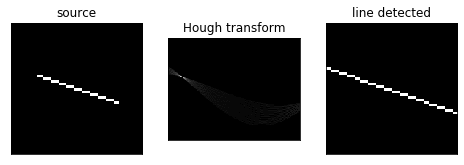

In [30]:
image_list = []
image = cv2.imread(os.path.join('images', '3.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta, hough_transform = hough_transform_line(image)
x1, y1, x2, y2 = pol_to_car(rho, theta)
image_list.append([hough_transform, 'Hough transform', 'img'])
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'q6')

for create proper files for sending in quera run this cell.

In [31]:
!python notebook_converter.py

End!!!